# <center> |  First Exploration |</center>

In [1]:
# importing classic libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
# loading train and test datasets 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# <center> | Exploratory Data Analysis & Feature Engineering | </center>

### 1. Analysis of the `target` feature :

In [4]:
print('target dist. in the train set ')
print(train.target.value_counts(normalize=True))


target dist. in the train set 
0    0.57034
1    0.42966
Name: target, dtype: float64


<AxesSubplot:xlabel='target', ylabel='count'>

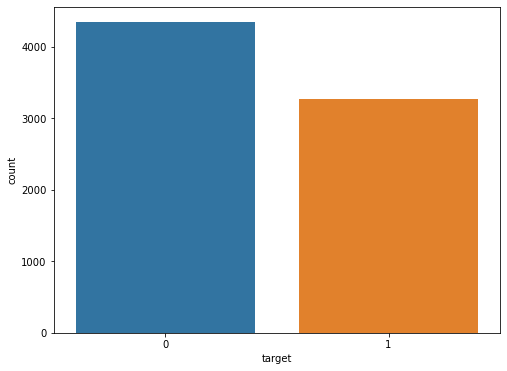

In [5]:
# distribution of labels in the train set
plt.figure(figsize=(8,6))
sns.countplot(x='target' ,data=train)

*Comment :* No strong imbalance in the classes

*Example of the tweets from the text feature *

In [6]:
real_disaster = train[train.target == 1].text
fake_disaster = train[train.target == 0].text

In [7]:
real_disaster

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

In [8]:
real_disaster_samples = real_disaster.sample(5).values
fake_disaster_samples = fake_disaster.sample(5).values

print('Real disaster \n')
for i, tweet in enumerate(real_disaster_samples):
    print(f'[{i+1}] {tweet}\n' )

print('-'*90)
print('Fake disaster \n')
for i, tweet in enumerate(fake_disaster_samples):
    print(f'[{i+1}] {tweet}\n' )


Real disaster 

[1] UPDATE:M.E. confirms 2 women pulled from burning house died last Friday. 91 yr old Edna Jefferson&amp;Doris Sherfield72. http://t.co/L6nSLzl7mI

[2] Angry Woman Openly Accuses NEMA Of Stealing Relief Materials Meant For IDPs: An angry Internally Displaced wom... http://t.co/TEq7SrI57P

[3] you can stab me in the back but I promise you'll be the one bleeding

[4] @Yankees body bagging mfs

[5] Condemnation clearly replacing the latest response aimlessly dryer evacuate detersion de: HLg

------------------------------------------------------------------------------------------
Fake disaster 

[1] Owner of Chicago-Area Gay Bar Admits to Arson Scheme http://t.co/0TSlQjOKvh via @theadvocatemag #LGBT

[2] Do you know anyone looking to move to Hammond OR? Share this listing! http://t.co/3xn1soh4Bb

[3] First Time Playing Hearthstone on PC Thoughts http://t.co/aBoLxMH1vy

[4] Just had my first counter on a league game against another Orianna I happened to demolish her xD. I

### 2. `Text` column Analysis

In [84]:
# add length feature 
train['len_text'] = train['text'].apply(len)
test['len_text'] = test['text'].apply(len)

In [10]:
train.groupby(['target'])['len_text'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4342.0,95.706817,35.885924,7.0,68.0,101.0,130.0,157.0
1,3271.0,108.113421,29.309854,14.0,88.0,115.0,136.0,151.0


<AxesSubplot:xlabel='len_text', ylabel='target'>

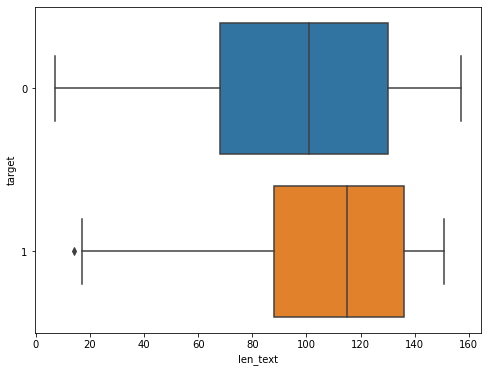

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train, x='len_text', y='target', orient='h')

*Comment :* Indeed, real disaster tweets are longer than the fake ones. 

Extracting more information : number of digits, punctuation marks, etc.

In [12]:
import string

def count_numbers(text):
    """ returns the count of numbers in a text"""
    count = 0
    for word in text.split():
        if [char for char in word if char in string.digits]:
            count += 1
    return count

def count_punctuation(text):
    """ returns the number of puncutation marks in a text """
    count = 0
    for char in text:
        if char in string.punctuation:
            count += 1
    return count

def check_punctuation(text):
    """ checks if a text contains punctuation marks"""
    if [char for char in text if char in string.punctuation]:
        return 1
    else: return 0

def check_numbers(text):
    """ checks if a text contains numbers"""
    if [char for char in text if char in string.digits]:
        return 1
    else: return 0


In [13]:
# apply to train
train['count_punctuation'] = train['text'].apply(count_punctuation)
train['count_numbers'] = train['text'].apply(count_numbers)
train['check_punctuation'] = train['text'].apply(check_punctuation)
train['check_numbers'] = train['text'].apply(check_numbers)

# apply to test
test['count_punctuation'] = test['text'].apply(count_punctuation)
test['count_numbers'] = test['text'].apply(count_numbers)
test['check_punctuation'] = test['text'].apply(check_punctuation)
test['check_numbers'] = test['text'].apply(check_numbers)


In [14]:
# relative statistics description
print("------------- count_punctuation -------------")
print(train.groupby(['target'])['count_punctuation'].describe())

print("\n------------- count_numbers -------------")
print(train.groupby(['target'])['count_numbers'].describe())

print("\n------------- check_punctuation -------------")
print(train.groupby(['target'])['check_punctuation'].describe())

print("\n------------- check_numbers -------------")
print(train.groupby(['target'])['check_numbers'].describe())

------------- count_punctuation -------------
         count      mean       std  min  25%  50%   75%   max
target                                                       
0       4342.0  6.309074  4.830297  0.0  3.0  6.0   9.0  61.0
1       3271.0  7.543565  4.195437  0.0  5.0  7.0  10.0  27.0

------------- count_numbers -------------
         count      mean       std  min  25%  50%  75%   max
target                                                      
0       4342.0  0.772685  1.039049  0.0  0.0  0.0  1.0  10.0
1       3271.0  1.171507  1.111076  0.0  0.0  1.0  2.0  10.0

------------- check_punctuation -------------
         count      mean       std  min  25%  50%  75%  max
target                                                     
0       4342.0  0.936435  0.244005  0.0  1.0  1.0  1.0  1.0
1       3271.0  0.979823  0.140628  0.0  1.0  1.0  1.0  1.0

------------- check_numbers -------------
         count      mean       std  min  25%  50%  75%  max
target                       

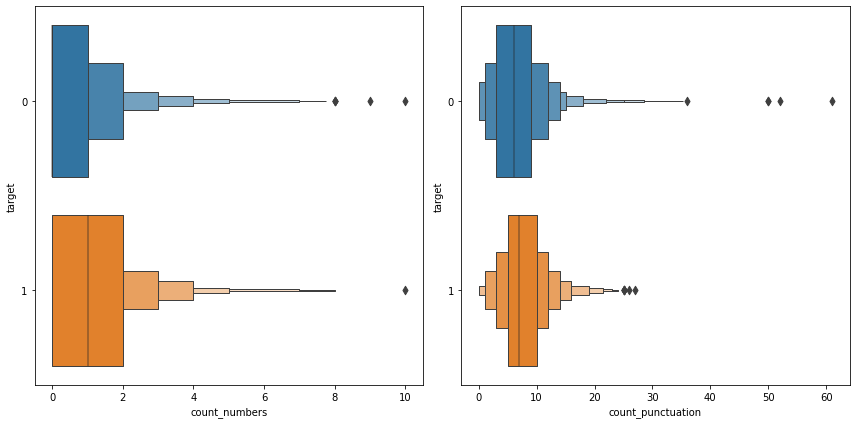

In [15]:
# visualising relative statistics  : count_punctuation, count_numbers
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxenplot(data=train, x='count_numbers', y='target', ax=ax[0], orient='h')
sns.boxenplot(data=train, x='count_punctuation', y='target', ax=ax[1], orient='h')

plt.tight_layout()

<AxesSubplot:xlabel='check_punctuation', ylabel='count'>

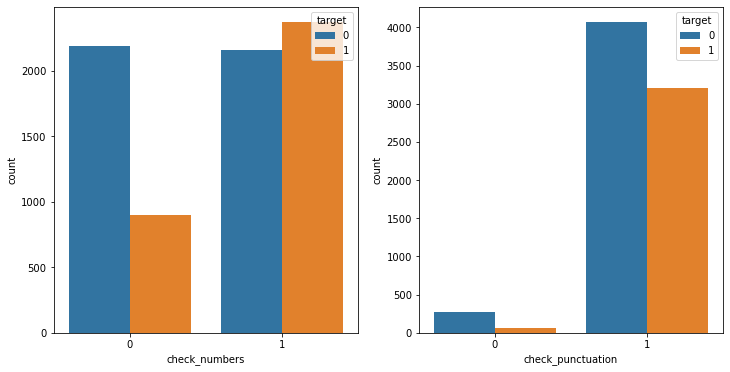

In [16]:
# visualising relative statistics  : count_punctuation, count_numbers
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#sns.displot(train['check_punctuation'])
sns.countplot(data= train, x='check_numbers', hue='target', ax=ax[0])
sns.countplot(data= train, x='check_punctuation', hue='target', ax=ax[1])


*Comment :* Tweets not having numbers are more likely to be fake disaster tweets. Therefore `chech_numbers` is an important feature in that regard. 

Whereas `check_punctuation` is not really an important feature since it does not allow to distinguish between the 2 classes of tweets. 

`count_punctuation` and `count_numbers` are not providing enough discerning information as well. 

*counting links and hashtags*

In [17]:
train['chech_http'] = train['text'].str.contains('http')
train['chech_hash'] = train['text'].str.contains('#')

test['chech_http'] = test['text'].str.contains('http')
test['chech_hash'] = test['text'].str.contains('#')

<AxesSubplot:xlabel='chech_hash', ylabel='count'>

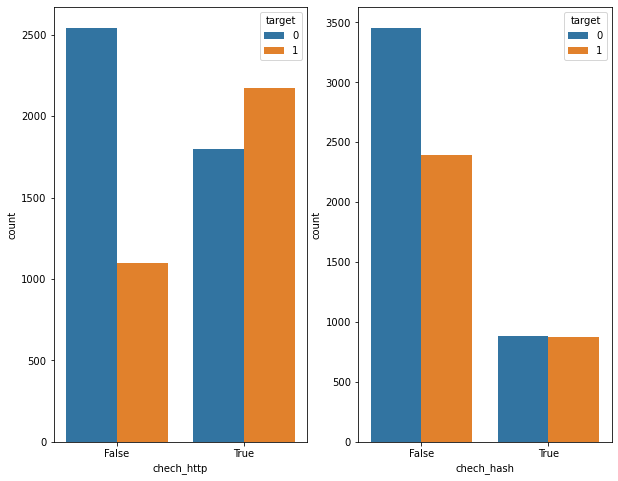

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10,8))

sns.countplot(data=train, x='chech_http', hue='target', ax=ax[0])
sns.countplot(data=train, x='chech_hash', hue='target', ax=ax[1])

*Comment :* Tweets not containing 'http' links are more likely to be fake. Same remark applies for tweets not containing '#'. 

### 3. Text Pre-processing

In this step, we will need to : 

> 1. `Remove stopwords`  : this is necessary, since regardless of the class of the target feature, these words will appear very often in tweets and will not affect in any way choice of target variable class. They will only contribute to create noise. 
2. `Convert all text to lowercase`
3. `Delete all http requests` (the http request link will not be deleted, but then we will remove the remaining characters using string.punctation). In facts, we no more this information since it is already captured in the *check_http* feature
4. `Replace all punctuation` from the text with char+' '
5. `Remove all other characters` that are not alpha, numbers and space
6. `Remove extra space between words`

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append("i'm")              # does not exist in the original list of stop_words

def clean_text(text):
    text = text.lower()               # lowercase text
    text = ' '.join([word for word in text.split() if word not in stop_words])        # removing stop-words + reajoining the words together in a new sentence
    text = ' '.join(['' if 'http' in word else word for word in text.split()])        # removing http links
    text = ''.join([' ' if char in string.punctuation else char for char in text])    # replace punctuation marks 
    text = ' '.join(text.split())     # remove extra space between words
    return text

    


In [20]:
real_text_samples = train[train.target == 1]['text'].sample(5)
fake_text_samples = train[train.target == 0]['text'].sample(5)

In [21]:
print('-'*60+' Real disaster '+'-'*60)
for i, text in enumerate(real_text_samples):
    print(f'Real [{i}] : {text}')
    print(f'Clean [{i}] : {clean_text(text)}\n')

print('-'*60+' Fake disaster '+'-'*60)
for i, text in enumerate(fake_text_samples):
    print(f'Real [{i}] : {text}')
    print(f'Clean [{i}] : {clean_text(text)}\n')

------------------------------------------------------------ Real disaster ------------------------------------------------------------
Real [0] : Acc to the study conducted by SKIMS morethan 50% population in #Kashmir suffer psychiatric disorders http://t.co/sAF9MoSkSN #KashmirConflict
Clean [0] : acc study conducted skims morethan 50 population kashmir suffer psychiatric disorders kashmirconflict

Real [1] : Young children among those rescued from capsized boat off Libya http://t.co/Kot9zVD2H7 via @IrishTimesWorld
Clean [1] : young children among rescued capsized boat libya via irishtimesworld

Real [2] : via @dw_english Hundreds feared drowned as migrant boat capsizes off Libya http://t.co/Cubc0nq6Fd #UFO4UBlogEurope
Clean [2] : via dw english hundreds feared drowned migrant boat capsizes libya ufo4ublogeurope

Real [3] : There's a fire in the Catalinas. Looks kinda cool. This picture doesn't do it justice. https://t.co/N0tAwGeZJx
Clean [3] : there s fire catalinas looks kinda cool 

In [22]:
# cleaning text
train['clean_text'] = train['text'].apply(clean_text)
test['clean_text'] = test['text'].apply(clean_text)
train.head(5).T

,0,1,2,3,4
id,1,4,5,6,7
keyword,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN
text,Our Deeds are the Reason of this #earthquake M...,Forest fire near La Ronge Sask. Canada,All residents asked to 'shelter in place' are ...,"13,000 people receive #wildfires evacuation or...",Just got sent this photo from Ruby #Alaska as ...
target,1,1,1,1,1
len_text,69,38,133,65,88
count_punctuation,1,1,3,2,2
count_numbers,0,0,0,1,0
check_punctuation,1,1,1,1,1
check_numbers,0,0,0,1,0


***Note :*** We can actually even go further and remove the numbers since already captured in the feature `count_numbers`. In fact, we do not really need to know what was the precise number cited in text, just the fact that the text contains some numbers is enough. 


### 4. Analysing `Keyword` Column

In [24]:
# null values in keyword column 
print('Number of null values in keyword column : ')
train['keyword'].isnull().sum()

Number of null values in keyword column : 


61

In [27]:
# replace NaN values in keyword column with 'Empty'
train['keyword'].fillna('Empty', inplace=True)
test['keyword'].fillna('Empty', inplace=True)
print('number of null values now : ', train['keyword'].isnull().sum())

number of null values now :  0


In [33]:
# unique values in keyword
train['keyword'].unique()

array(['Empty', 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 

In [35]:
# number of unique values in keyword column 
train['keyword'].nunique()

222

keyword contains many unique values that are similar in meaning to each other.

They can be combined into one value like destroy and destroyed

However, **the use of more colloquial keywords may have an impact on the target feature**, so I will not process them, as we may lose the emotional color of the keyword value.

In [40]:
train[train['target'] == 1]['keyword'].value_counts()

Empty          42
outbreak       39
derailment     39
wreckage       39
debris         37
               ..
ruin            1
electrocute     1
body%20bags     1
blazing         1
body%20bag      1
Name: keyword, Length: 221, dtype: int64

<AxesSubplot:xlabel='count', ylabel='keyword'>

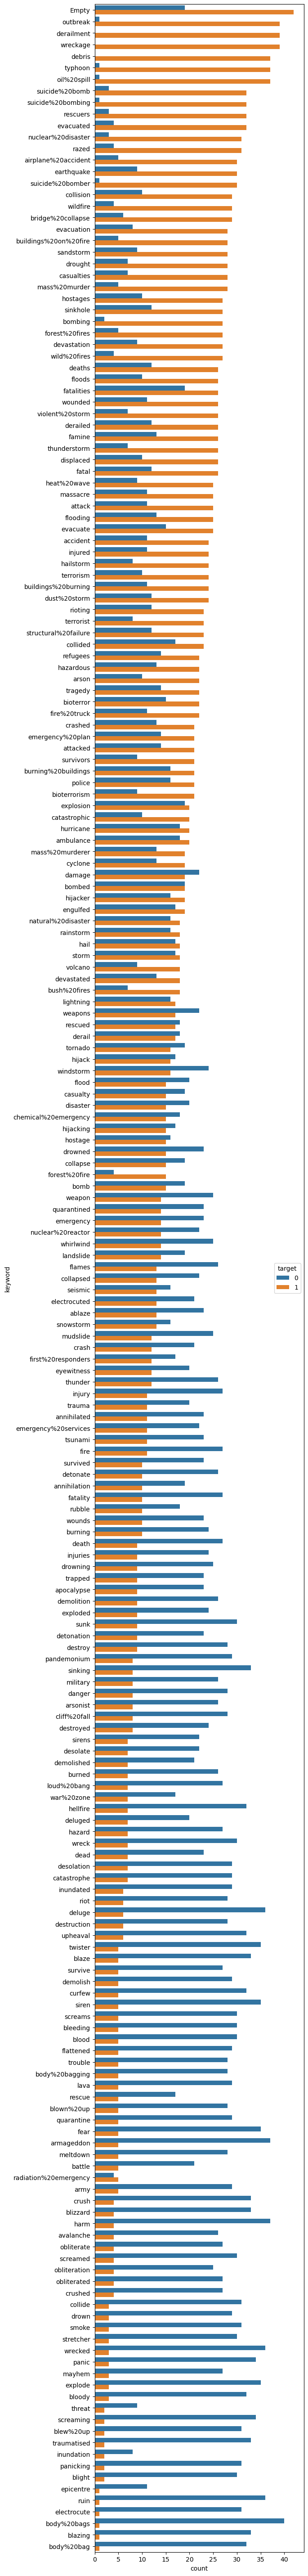

In [46]:
plt.figure(figsize = (6,75), dpi=100)
sns.countplot(data=train, y='keyword', hue='target', order=train[train['target'] == 1]['keyword'].value_counts().index)

The countplot clearly shows how most keyword values have a serious impact on the target feature.



### 4. Analysing `location` Column

In [57]:
# number of missing values
print('Number of missing values : ', train['location'].isnull().sum())

# proporion of missing values
print('Proportion of missing values :', round(train['location'].isnull().sum()/train.shape[0]*100, 2), '%')


Number of missing values :  2533
Proportion of missing values : 33.27 %


The proportion of missing values is huge (1 third!). However, let's take a closer look to its values

In [65]:
# number of unique values
train['location'].nunique()

3341

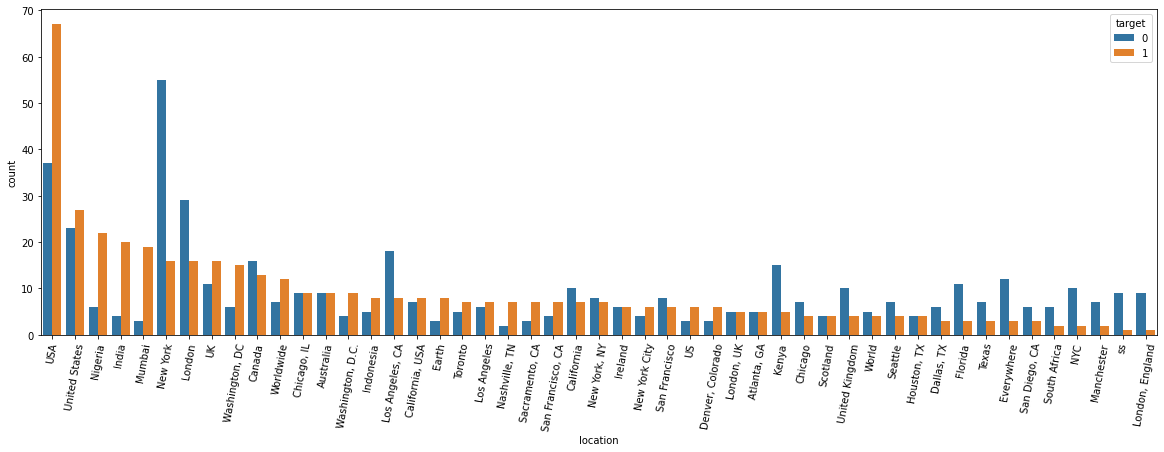

In [83]:
top_location = train['location'].value_counts(normalize=True).head(50).index
plt.figure(figsize=(20, 6))
sns.countplot(data=train[train['location'].isin(top_location)], x='location', hue='target', order=train[train['location'].isin(top_location)][train['target']==1]['location'].value_counts().index)
plt.xticks(rotation=80);

The countplot shows that most of the tweets were from the USA and UK.

This large number of unique values tells us that there are very few tweets per location value, not counting USA and UK.

Perhaps it is worth clearing this feature and entering only 3 unique values: **UK, USA, Other**.

However, we should not forget that the number of missing values in location is very large and by setting the value to empty we will create a lot of artificial information. Hence it is better to just **remove the location column**. 

# <center> | Data Pre-processing | </center>

We will move to the step of solving the competition. But first, remember that we have created many new features, and there might be highly correalted. So first, let us take a closer look into the **correlation matrix**. 

> * For instance, we can think intuitively that the feature `count_punctuation` depends highly on the length of text. Therefore we can remove it. 
> * Leave the feature `chech_numbers` as we have seen that it carries important information regarding the target label. 
> * Remove the `location` feature
> * Remove `id` and `text` since important information from text have been extracted in the column `clean_text`.

,id,keyword,location,text,target,len_text,count_punctuation,count_numbers,check_punctuation,check_numbers,chech_http,chech_hash,clean_text
0,1,Empty,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,1,0,1,0,False,True,deeds reason earthquake may allah forgive us
1,4,Empty,NaN,Forest fire near La Ronge Sask. Canada,1,38,1,0,1,0,False,False,forest fire near la ronge sask canada
2,5,Empty,NaN,All residents asked to 'shelter in place' are ...,1,133,3,0,1,0,False,False,residents asked shelter place notified officer...
3,6,Empty,NaN,"13,000 people receive #wildfires evacuation or...",1,65,2,1,1,1,False,True,13 000 people receive wildfires evacuation ord...
4,7,Empty,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,2,0,1,0,False,True,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,Empty,NaN,Two giant cranes holding a bridge collapse int...,1,83,5,1,1,1,True,False,two giant cranes holding bridge collapse nearb...
7609,10870,Empty,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,5,0,1,0,False,False,aria ahrary thetawniest control wild fires cal...
7610,10871,Empty,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,11,4,1,1,True,False,m1 94 01 04 utc 5km volcano hawaii
7611,10872,Empty,NaN,Police investigating after an e-bike collided ...,1,137,5,0,1,0,False,False,police investigating e bike collided car littl...


In [86]:
# clean_train and clean_test
clean_train = train.drop(['id', 'text', 'count_numbers', 'count_punctuation', 'location'], axis=1)
clean_test = test.drop(['id', 'text', 'count_numbers', 'count_punctuation', 'location'], axis=1)

In [88]:
clean_train.head(5)

,keyword,target,len_text,check_punctuation,check_numbers,chech_http,chech_hash,clean_text
0,Empty,1,69,1,0,False,True,deeds reason earthquake may allah forgive us
1,Empty,1,38,1,0,False,False,forest fire near la ronge sask canada
2,Empty,1,133,1,0,False,False,residents asked shelter place notified officer...
3,Empty,1,65,1,1,False,True,13 000 people receive wildfires evacuation ord...
4,Empty,1,88,1,0,False,True,got sent photo ruby alaska smoke wildfires pou...


<AxesSubplot:title={'center':'After \n'}>

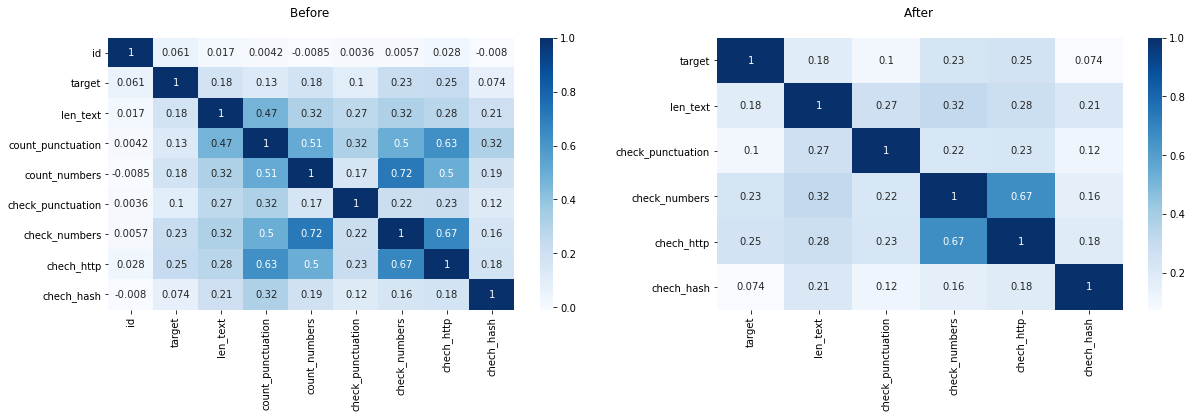

In [97]:
# correlation matrix
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].title.set_text('Before \n')
sns.heatmap(train.corr(), ax=ax[0], annot=True, cmap='Blues')

ax[1].title.set_text('After \n')
sns.heatmap(clean_train.corr(), ax=ax[1], annot=True, cmap='Blues')

We can also notice that `chech_http` is somewhat highely correlated to `check_numbers`. This is true since most http links are mainly digits. Therefore, it might reasonable to remove `chech_http`.

### 1. Additional Features Pre-processing

In [104]:
# fix a spell mistake in the name of columns
clean_train.rename(columns={'chech_http' : 'check_http', 'chech_hash':'check_hash'}, inplace=True)
clean_test.rename(columns={'chech_http' : 'check_http', 'chech_hash':'check_hash'}, inplace=True)

In [107]:
clean_train.head(5)

,keyword,target,len_text,check_punctuation,check_numbers,check_http,check_hash,clean_text
0,Empty,1,69,1,0,False,True,deeds reason earthquake may allah forgive us
1,Empty,1,38,1,0,False,False,forest fire near la ronge sask canada
2,Empty,1,133,1,0,False,False,residents asked shelter place notified officer...
3,Empty,1,65,1,1,False,True,13 000 people receive wildfires evacuation ord...
4,Empty,1,88,1,0,False,True,got sent photo ruby alaska smoke wildfires pou...


In [108]:
# converting boolean features (check_http, check_hash) into binary int 
clean_train['check_http'] = clean_train['check_http'].apply(lambda x: 1 if x else 0)
clean_train['check_hash'] = clean_train['check_hash'].apply(lambda x: 1 if x else 0)

clean_test['check_http'] = clean_test['check_http'].apply(lambda x: 1 if x else 0)
clean_test['check_hash'] = clean_test['check_hash'].apply(lambda x: 1 if x else 0)

In [109]:
clean_train.head(5)

,keyword,target,len_text,check_punctuation,check_numbers,check_http,check_hash,clean_text
0,Empty,1,69,1,0,0,1,deeds reason earthquake may allah forgive us
1,Empty,1,38,1,0,0,0,forest fire near la ronge sask canada
2,Empty,1,133,1,0,0,0,residents asked shelter place notified officer...
3,Empty,1,65,1,1,0,1,13 000 people receive wildfires evacuation ord...
4,Empty,1,88,1,0,0,1,got sent photo ruby alaska smoke wildfires pou...


*Standardizing `len_text` using MinMaxScaler*

In [120]:
from sklearn.preprocessing import MinMaxScaler

scal = MinMaxScaler()
scal.fit(clean_train['len_text'].values.reshape(-1,1))   # reshape is used to change from (n,) into (n,1)
clean_train['len_text'] = scal.transform(clean_train['len_text'].values.reshape(-1,1))
clean_test['len_text'] = scal.transform(clean_test['len_text'].values.reshape(-1,1))

### 2. Text Pre-processing

For this block, we need to perform the following operations:  

1. We apply **word_tokenize()** to the text in order to split() all the words of the text. Why didn't we use split()? word_tokenize was created to handle large text sizes, so **word_tokenize is faster than split()**.
2. We apply **WordNetLemmatizer()** to the text in order to bring the words to the basic forms of the word, **preserving the contextual meaning of the sentence** (unlike *stemming*).

In [121]:
from nltk.tokenize import word_tokenize
clean_train['clean_text'] = clean_train['clean_text'].apply(word_tokenize)
clean_test['clean_text'] = clean_test['clean_text'].apply(word_tokenize)

In [124]:
print("Before : ", train['clean_text'][1])
print("After : ", clean_train['clean_text'][1])

Before :  forest fire near la ronge sask canada
After :  ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']


In [135]:
#import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

def lem_word(text):
    """ lemmatizing text"""
    text_lem = [lem.lemmatize(word) for word in text]
    return text_lem

In [137]:
# lemmatizing clean_text
clean_train['clean_text'] = clean_train['clean_text'].apply(lem_word)
clean_test['clean_text'] = clean_test['clean_text'].apply(lem_word)

In [145]:
print('Before: ', train['clean_text'][16])
print('After: ', clean_train['clean_text'][16])

Before:  love fruits
After:  ['love', 'fruit']


### 3. Constructing Training Dataset

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?',]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [147]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [148]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>